# Star Processing

c:\Users\User\anaconda3\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


torch.Size([3, 666, 1000])
tensor(0.9873)


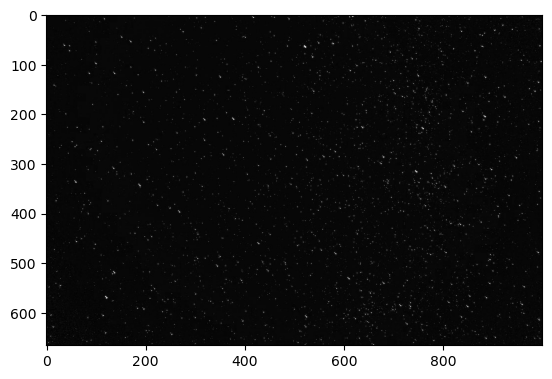

torch.Size([3, 333, 500]) tensor(7.4074e-05)


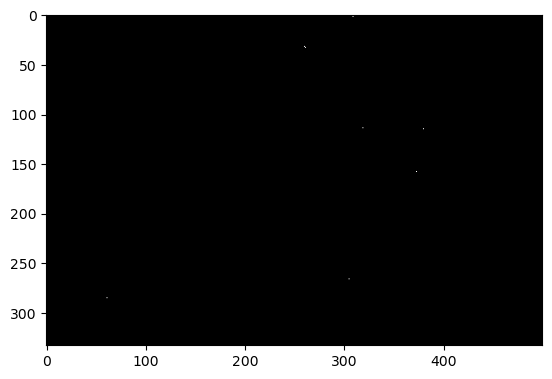

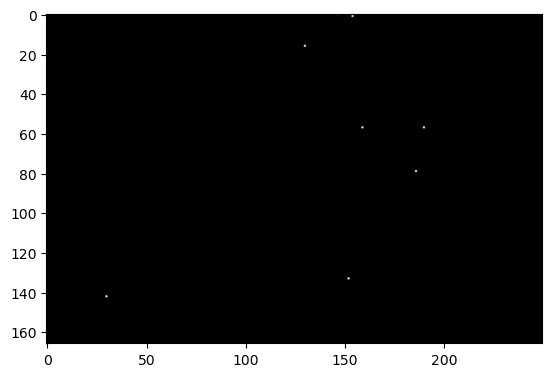

In [4]:
import numpy as np, torch, torchvision, torchvision.transforms as T, matplotlib.pyplot as plt, random as rr
from PIL import Image

def load_image(path):
    img = Image.open(path)
    # img = T.Resize((224, 224))(img)
    img = T.ToTensor()(img) # But this leads to loss of information, so try this:

    # img = T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(img)
    # Convert to grey scale by averaging the 3 channels
    # img = img.mean(0)
    # Convert to binary file with 0 and 255 based on a threshold = 0.7
    # img = (img > 0.7).float() * 255
    
    # img = img.unsqueeze(0)
    return img

# Important
def max_pool_image(img, kernel_size=2, stride=2):
    img = torch.nn.functional.max_pool2d(img, kernel_size=kernel_size, stride=stride)
    return img

def binarize_image(img, threshold=0.8):
    img = (img > threshold).float() * 255
    return img


    # sh =img.shape
    # for i in range(sh[0]):
    #     for j in range(sh[1]):
    #         if img[i][j] > threshold:
    #             img[i][j] = 1
    #         else:
    #             img[i][j] = 0
    # return img
    
# Less Important
def avg_pool_image(img, kernel_size=2, stride=2):
    img = torch.nn.functional.avg_pool2d(img, kernel_size=kernel_size, stride=stride)
    return img
def upsample_image(img, scale_factor=2): # It is also called deconvolution - it is the opposite of max_pooling. It will increase the size of the image
    img = torch.nn.functional.interpolate(img, scale_factor=scale_factor, mode='nearest')
    return img
def downsample_image(img, scale_factor=2): # It will reduce the size of the 
    img = torch.nn.functional.interpolate(img, scale_factor=1/scale_factor, mode='nearest')
    return img
def convolve_image(img, kernel):
    img = torch.nn.functional.conv2d(img, kernel)
    return img
def normalize_image(img, mean, std):
    img = T.Normalize(mean=mean, std=std)(img)
    return img



def plot_image(img):
    plt.imshow(img[0], cmap='gray')
    plt.show()

path = 'stars.jpeg'
def task1(path):

    img = load_image(path)
    print(img.shape)
    print(img.count_nonzero()/img.numel())
    plot_image(img)

    img = avg_pool_image(img)
    img = binarize_image(img)
    print(img.shape, img.count_nonzero()/img.numel())
    plot_image(img)

    img = max_pool_image(img)
    plot_image(img)


task1(path)

def task2(path):

    img = load_image(path)
    print(img.shape)
    print('Initial Image:')
    # print(img.count_nonzero()/img.numel())
    plot_image(img)

    img = max_pool_image(img)
    # print(img.shape, img.count_nonzero()/img.numel())
    # plot_image(img)

    img = max_pool_image(img)
    img = max_pool_image(img)
    print('After 3 max_pooling:')
    plot_image(img)

# model = load_model()
# out = predict(model, img)
# print(out)

In [5]:
for i in range(1,5):
    print(f'Processing image {i}')
    path = f'skyimages/image{i}.jpg'
    # task2(path)

Processing image 1
Processing image 2
Processing image 3
Processing image 4


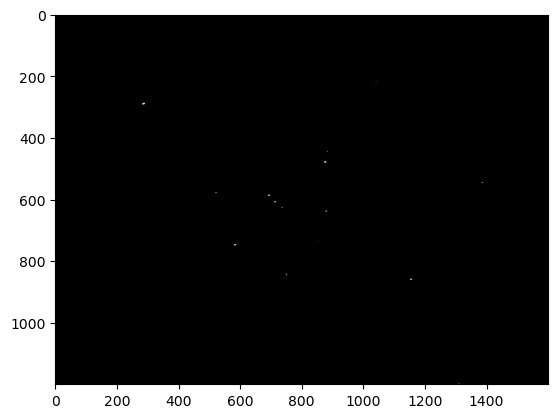

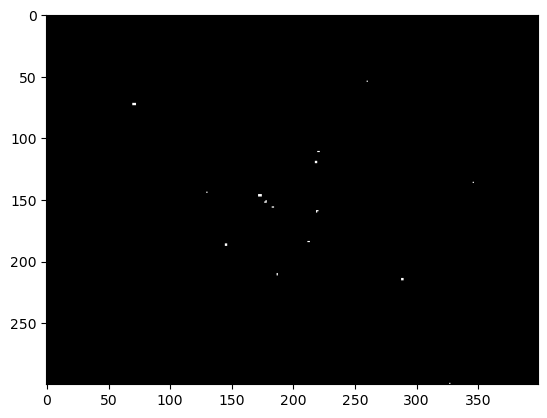

In [6]:
img = Image.open('skyimages/image2.jpg')
plt.imshow(img)

# convert to binary

img = T.ToTensor()(img)
img = binarize_image(img, threshold=0.09)
plt.imshow(img[0], cmap='gray')
plt.show()

# img = max_pool_image(img)
img = avg_pool_image(img)
img = max_pool_image(img)
img = binarize_image(img, threshold=0.7)

plt.imshow(img[0], cmap='gray')
plt.show()

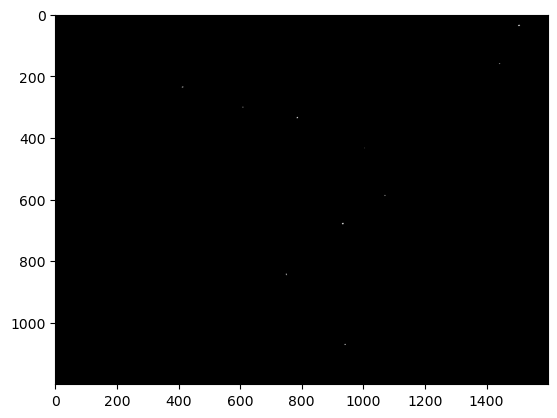

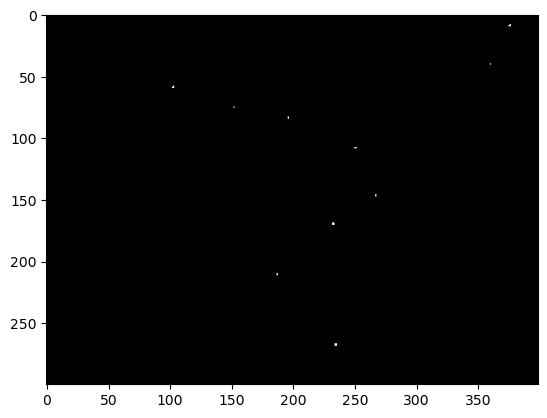

In [7]:
img = Image.open('skyimages/image1.jpg')
plt.imshow(img)

# convert to binary

img = T.ToTensor()(img)
img = binarize_image(img, threshold=0.09)
plt.imshow(img[0], cmap='gray')
plt.show()

# img = max_pool_image(img)
img = avg_pool_image(img)
img = max_pool_image(img)
img = binarize_image(img, threshold=0.7)

plt.imshow(img[0], cmap='gray')
plt.show()

torch.Size([3, 600, 799]) tensor(7.6484e-05)


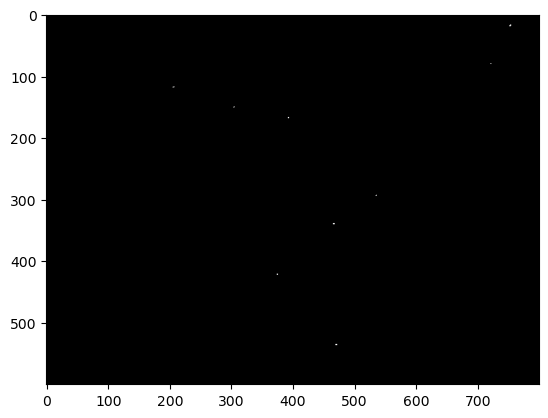

-----------------------------------
torch.Size([3, 600, 799]) tensor(0.0002)


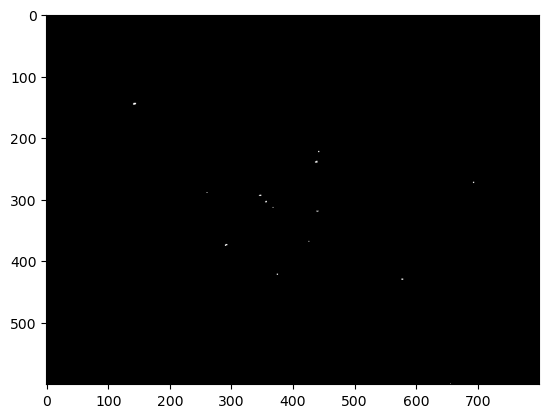

-----------------------------------
torch.Size([3, 600, 799]) tensor(4.2414e-05)


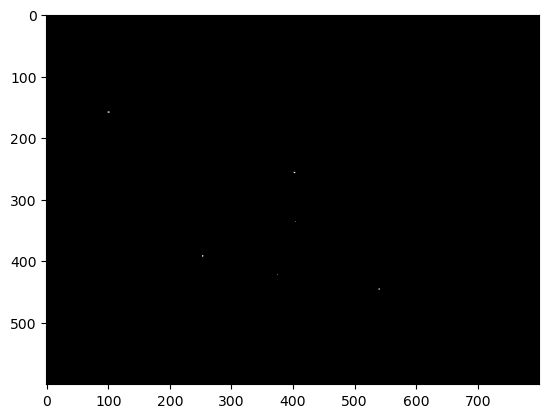

-----------------------------------
torch.Size([3, 600, 799]) tensor(0.0009)


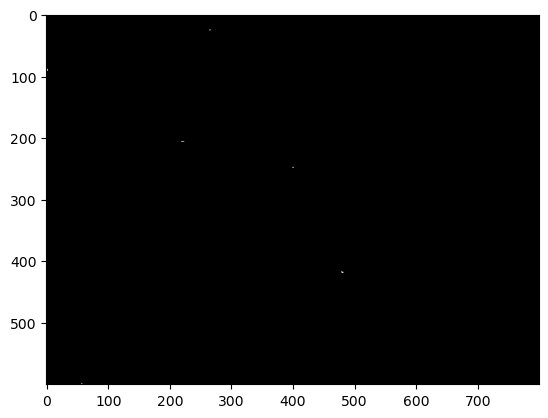

-----------------------------------


In [8]:
def pranav_camera(path):
    img = Image.open(path)
    img = T.ToTensor()(img)
    img = binarize_image(img, threshold=0.1)
    # img = avg_pool_image(img)
    img = max_pool_image(img)
    # img = binarize_image(img, threshold=0.7)
    return img

for i in range(1,5):
    path = f'skyimages/image{i}.jpg'
    img = pranav_camera(path)
    plt.imshow(img[0], cmap='gray')
    print(img.shape, img.count_nonzero()/img.numel())
    plt.show()
    print('-----------------------------------')
# img = pranav_camera('stars.jpeg')
# plt.imshow(img[0], cmap='gray')
# plt.show()

torch.Size([510, 382]) tensor(0.0009)


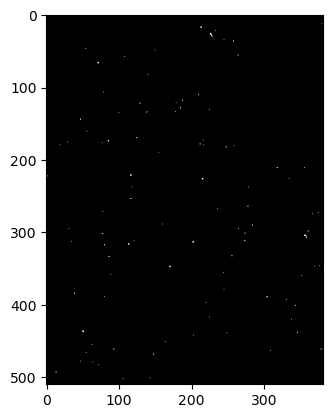

-----------------------------------
torch.Size([512, 384]) tensor(0.0004)


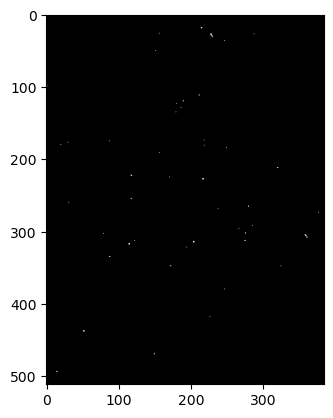

-----------------------------------
torch.Size([384, 512]) tensor(0.0004)


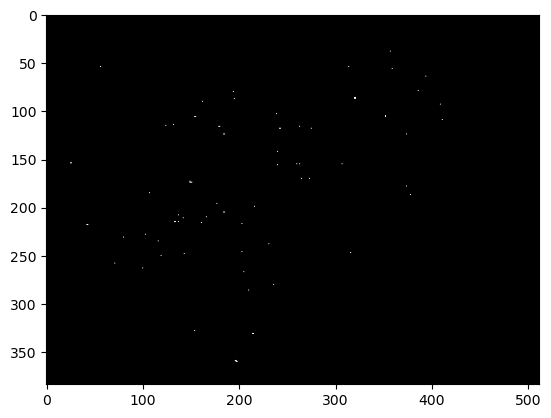

-----------------------------------
torch.Size([382, 510]) tensor(0.0007)


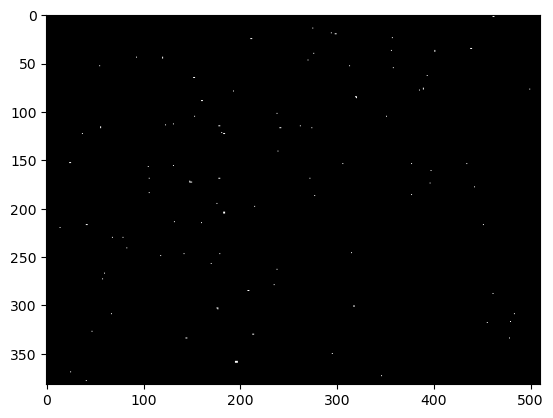

-----------------------------------
torch.Size([384, 512]) tensor(0.0234)


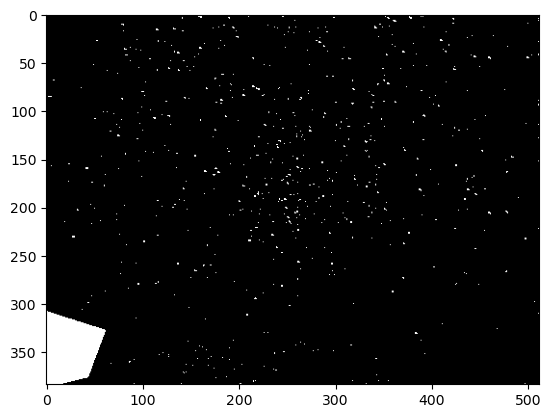

-----------------------------------


In [9]:
def manas_camera(path):
    img = Image.open(path)
    img = T.ToTensor()(img)
    img = binarize_image(img, threshold=0.4)
    img = max_pool_image(img)
    img = max_pool_image(img)
    img = max_pool_image(img)
    # img = binarize_image(img, threshold=0.7)
    img = img.int()
    img = img[0]|img[1]|img[2]
    return img

for i in range(1,6):
    path = f'manas/image{i}.jpg'
    img = manas_camera(path)
    plt.imshow(img, cmap='gray')
    print(img.shape, img.count_nonzero()/img.numel())
    plt.show()
    print('-----------------------------------')
# img = manas_camera('stars.jpeg')
# plt.imshow(img[0], cmap='gray')
# plt.show()

Pranav
torch.Size([375, 500]) tensor(0.0007)


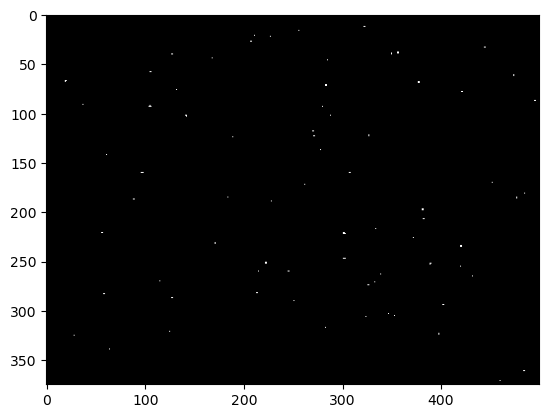

-----------------------------------
Manas
torch.Size([375, 500]) tensor(0.0002)


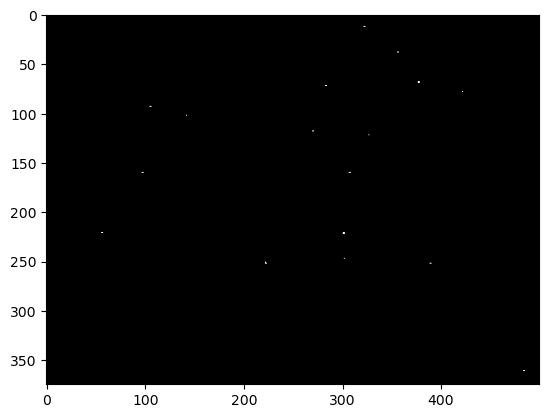

-----------------------------------


In [10]:
def pranav_camera(path):
    img = Image.open(path)
    img = T.ToTensor()(img)
    img = binarize_image(img, threshold=0.1)
    img = max_pool_image(img)
    img = max_pool_image(img)
    img = max_pool_image(img)
    img = binarize_image(img, threshold=0.7)
    img = img.int()
    img = img[0] | img[1] | img[2]
    return img

# Pranav's camera Processing
print('Pranav')
for i in range(1,2):
    path = f'aditya/image{i}.jpg'
    img = pranav_camera(path)
    plt.imshow(img, cmap='gray')
    print(img.shape, img.count_nonzero()/img.numel())
    plt.show()
    print('-----------------------------------')

# Manas's Camera Processing
    print('Manas')
for i in range(1,2):
    path = f'aditya/image{i}.jpg'
    img = manas_camera(path)
    plt.imshow(img, cmap='gray')
    print(img.shape, img.count_nonzero()/img.numel())
    plt.show()
    print('-----------------------------------')

# img = pranav_camera('stars.jpeg')
# plt.imshow(img[0], cmap='gray')
# plt.show()

torch.Size([150, 199]) tensor(0.0004)


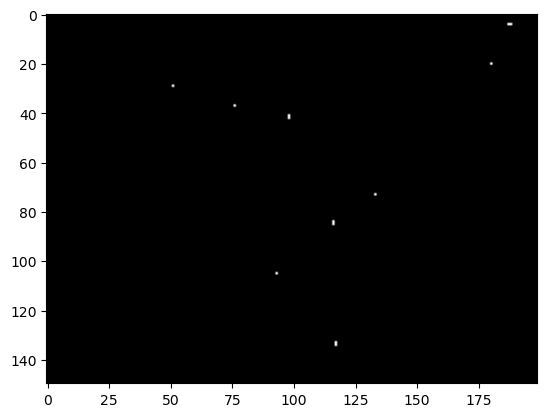

Number of stars: 9
Coordinates of stars: [[4.0, 187.5], [20.0, 180.0], [29.0, 51.0], [37.0, 76.0], [41.5, 98.0], [73.0, 133.0], [84.5, 116.0], [105.0, 93.0], [133.5, 117.0]]


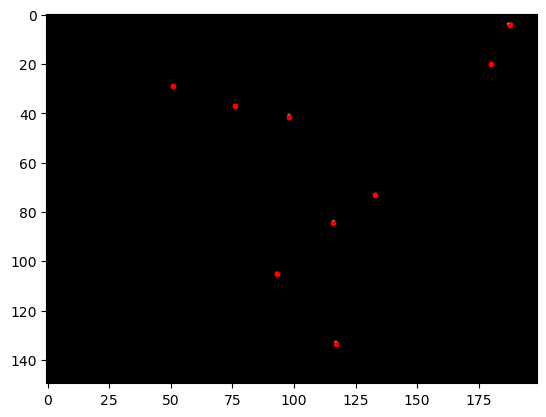

-----------------------------------
torch.Size([150, 199]) tensor(0.0008)


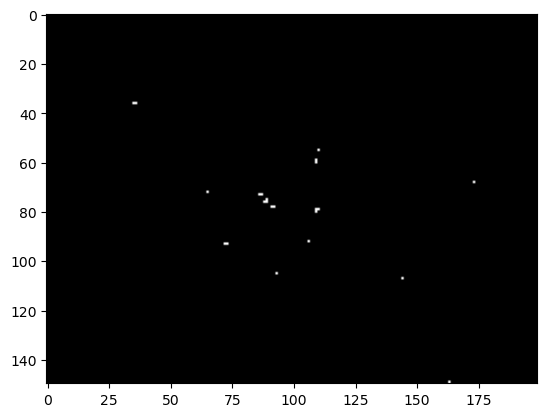

Number of stars: 14
Coordinates of stars: [[36.0, 35.5], [55.0, 110.0], [59.5, 109.0], [68.0, 173.0], [72.0, 65.0], [73.0, 86.5], [75.667, 88.667], [78.0, 91.5], [79.333, 109.333], [92.0, 106.0], [93.0, 72.5], [105.0, 93.0], [107.0, 144.0], [149.0, 163.0]]


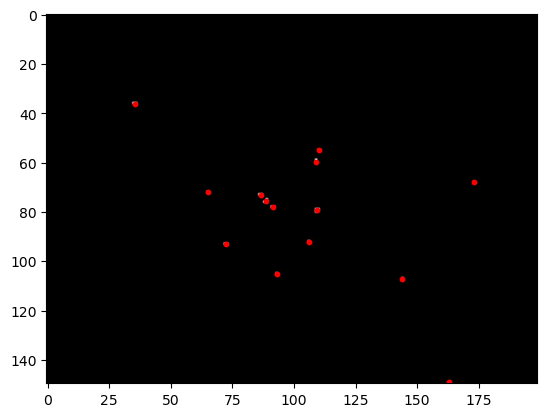

-----------------------------------
torch.Size([150, 199]) tensor(0.0003)


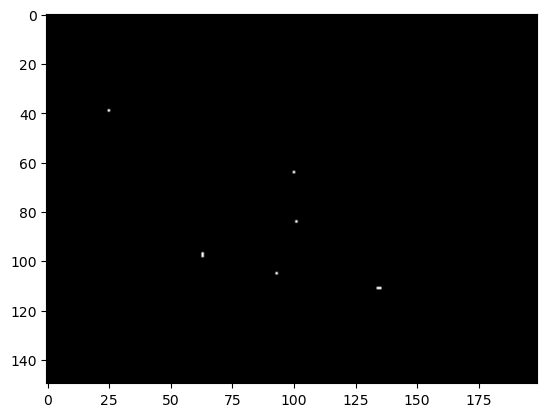

Number of stars: 6
Coordinates of stars: [[39.0, 25.0], [64.0, 100.0], [84.0, 101.0], [97.5, 63.0], [105.0, 93.0], [111.0, 134.5]]


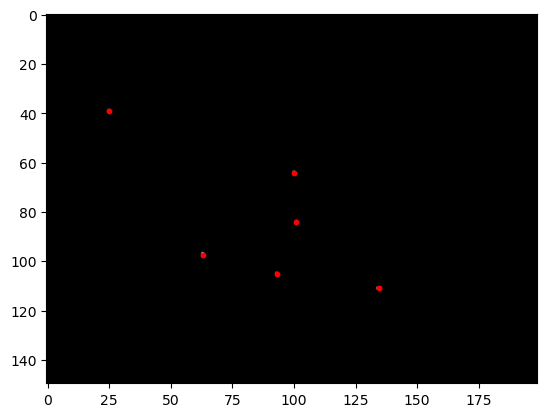

-----------------------------------


In [11]:
# Great! Now we have the binary images which clearly shows the stars. Now we need to create a rule based system to count the number of stars in the image.

# But a continuous cluster of 1's can be considered as a single star. So, we need to count the number of such clusters.
# we can use recursive function to count the number of clusters in the image.

# Let's first create a function to count the number of clusters in the image.
def count_stars(img):
    # Let's create a recursive function to count the number of clusters in the image.
    def count_clusters(img, i, j):
        if i < 0 or j < 0 or i >= img.shape[0] or j >= img.shape[1] or img[i][j] == 0:
            return 0
        img[i][j] = 0
        count_clusters(img, i+1, j)
        count_clusters(img, i-1, j)
        count_clusters(img, i, j+1)
        count_clusters(img, i, j-1)
        count_clusters(img, i+1, j+1)
        count_clusters(img, i-1, j-1)
        count_clusters(img, i+1, j-1)
        count_clusters(img, i-1, j+1)
        return 1
    count = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            count += count_clusters(img, i, j)
    return count


# Excellent!
# Now, we need to get the coordinates of the stars in the image. We can use the same recursive function to get the coordinates of the stars.
# we need to get the centroid of the clusters to get the coordinates of the stars. We can use the same recursive function to get the centroid of the clusters.

# Let's first create a function to get the coordinates of the stars in the image.
def get_stars(img):
    # Let's create a recursive function to get the coordinates of the stars in the image.
    def get_clusters(img, i, j):
        if i < 0 or j < 0 or i >= img.shape[0] or j >= img.shape[1] or img[i][j] == 0:
            return (0, 0, 0)
        img[i][j] = 0
        x1, y1, c1 = get_clusters(img, i+1, j)
        x2, y2, c2 = get_clusters(img, i-1, j)
        x3, y3, c3 = get_clusters(img, i, j+1)
        x4, y4, c4 = get_clusters(img, i, j-1)
        x5, y5, c5 = get_clusters(img, i+1, j+1)
        x6, y6, c6 = get_clusters(img, i-1, j-1)
        x7, y7, c7 = get_clusters(img, i+1, j-1)
        x8, y8, c8 = get_clusters(img, i-1, j+1)
        return (i + x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8, j + y1 + y2 + y3 + y4 + y5 + y6 + y7 + y8, c1 + c2 + c3 + c4 + c5 + c6 + c7 + c8 + 1) # x, y, count
    stars = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            x, y, c = get_clusters(img, i, j)
            if c > 0:
                # stars.append(((x/c).__round__(3), (y/c).__round__(3), c))
                stars.append([(x/c).__round__(3), (y/c).__round__(3)])
    return stars

import copy
# Let's test the function
for i in range(1,4):
    path = f'skyimages/image{i}.jpg'
    img = pranav_camera(path)
    plt.imshow(img, cmap='gray')
    print(img.shape, img.count_nonzero()/img.numel())
    plt.show()
    img_temp = copy.deepcopy(img)
    print('Number of stars:', count_stars(img_temp))
    img_temp = copy.deepcopy(img)
    coordinaates = get_stars(img_temp)
    print('Coordinates of stars:', coordinaates)
    # Now, let's plot the stars in the image
    plt.imshow(img, cmap='gray')
    for star in coordinaates:
        plt.scatter(star[1], star[0], c='red', s = 10)
    plt.show()
    
    print('-----------------------------------')


torch.Size([150, 199])


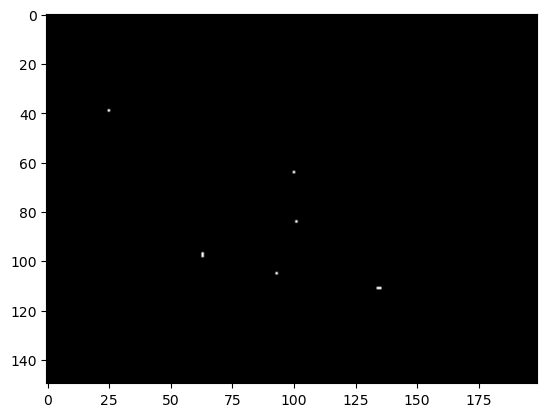

In [12]:
def plot_stars(img):
    # find the coordinates of the stars
    img_temp = copy.deepcopy(img)
    coordinaates = get_stars(img_temp)
    # Now, let's plot the stars in the image
    print('Number of stars:', len(coordinaates))
    print('Coordinates of stars:', coordinaates)
    plt.imshow(img, cmap='gray')
    
    for star in coordinaates:
        plt.scatter(star[1], star[0], c='red', s = 1)
    plt.show()
    

print(img.shape)
#  change the type of img to int
# print(new_img.shape)
plt.imshow(img, cmap='gray')
plt.show()

Pranav
Processing image 1


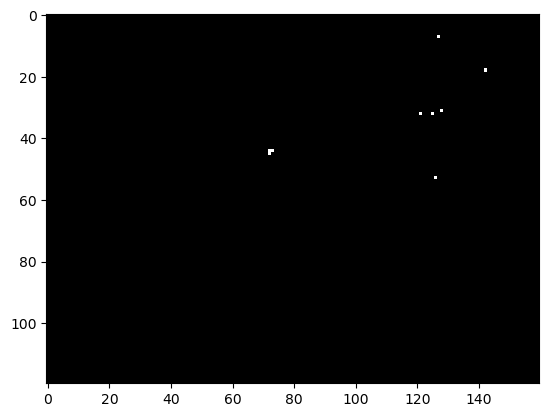

Number of stars: 7
Coordinates of stars: [[7.0, 127.0], [18.0, 142.0], [31.0, 128.0], [32.0, 121.0], [32.0, 125.0], [44.333, 72.333], [53.0, 126.0]]


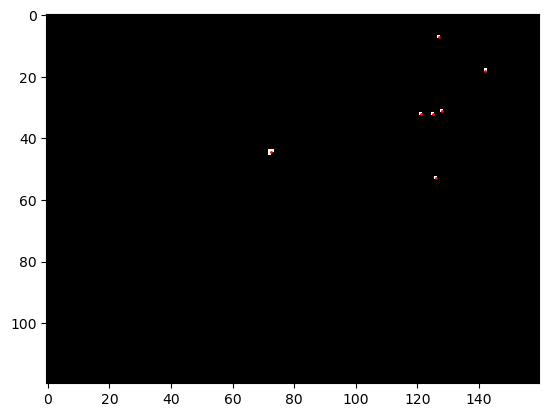

Processing image 2


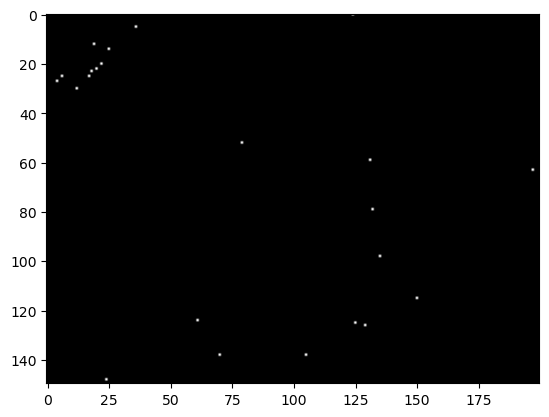

Number of stars: 23
Coordinates of stars: [[0.0, 124.0], [5.0, 36.0], [12.0, 19.0], [14.0, 25.0], [20.0, 22.0], [22.0, 20.0], [23.0, 18.0], [25.0, 6.0], [25.0, 17.0], [27.0, 4.0], [30.0, 12.0], [52.0, 79.0], [59.0, 131.0], [63.0, 197.0], [79.0, 132.0], [98.0, 135.0], [115.0, 150.0], [124.0, 61.0], [125.0, 125.0], [126.0, 129.0], [138.0, 70.0], [138.0, 105.0], [148.0, 24.0]]


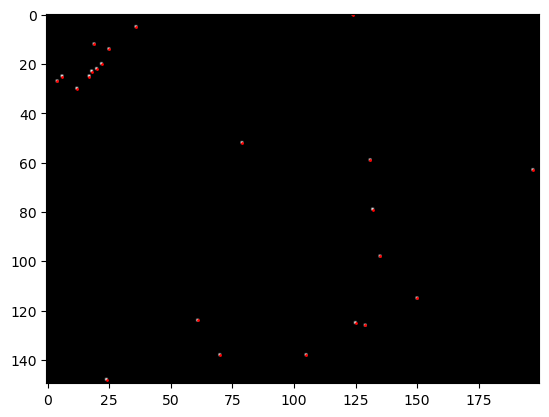

Processing image 3


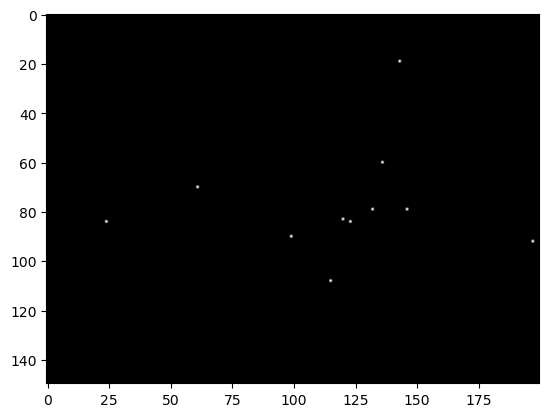

Number of stars: 11
Coordinates of stars: [[19.0, 143.0], [60.0, 136.0], [70.0, 61.0], [79.0, 132.0], [79.0, 146.0], [83.0, 120.0], [84.0, 24.0], [84.0, 123.0], [90.0, 99.0], [92.0, 197.0], [108.0, 115.0]]


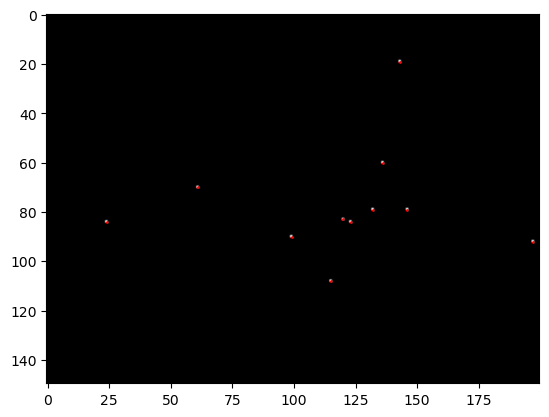

Processing image 4


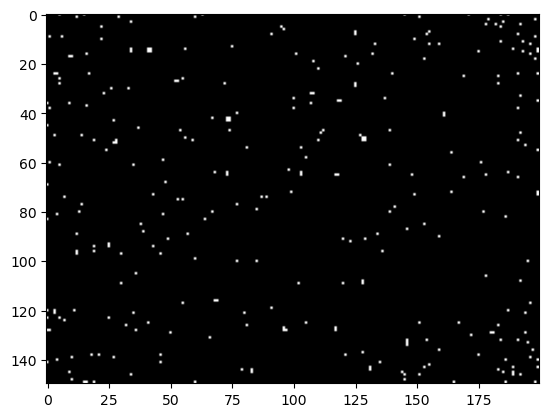

Number of stars: 261
Coordinates of stars: [[0.0, 5.0], [0.0, 15.0], [0.0, 63.0], [0.0, 145.0], [0.0, 171.0], [0.0, 184.0], [0.0, 187.0], [1.0, 12.0], [1.0, 29.0], [1.0, 60.0], [1.0, 151.0], [2.0, 179.0], [2.0, 198.0], [3.0, 34.0], [3.0, 185.0], [4.0, 178.0], [4.0, 182.0], [4.0, 192.0], [5.0, 22.0], [5.5, 95.5], [5.0, 184.0], [7.5, 125.0], [7.5, 154.5], [8.0, 91.0], [8.0, 191.0], [9.0, 1.0], [9.0, 6.0], [9.0, 198.0], [10.0, 22.0], [10.0, 149.0], [11.0, 184.0], [11.0, 193.0], [12.0, 133.0], [12.0, 155.0], [12.0, 159.0], [12.0, 196.0], [13.0, 75.0], [14.5, 34.0], [14.5, 41.5], [14.0, 56.0], [14.0, 189.0], [14.5, 199.0], [15.0, 175.0], [15.0, 193.0], [16.0, 16.0], [16.0, 101.0], [16.0, 132.0], [16.0, 196.0], [17.0, 9.5], [17.0, 121.0], [18.0, 153.0], [18.0, 198.0], [19.0, 108.0], [20.0, 126.0], [22.0, 110.0], [24.0, 3.5], [24.0, 17.0], [24.0, 140.0], [24.0, 191.0], [24.0, 199.0], [25.0, 169.0], [25.0, 183.0], [26.0, 5.0], [26.0, 55.0], [27.0, 52.5], [28.0, 5.0], [28.0, 72.0], [28.5, 125.0

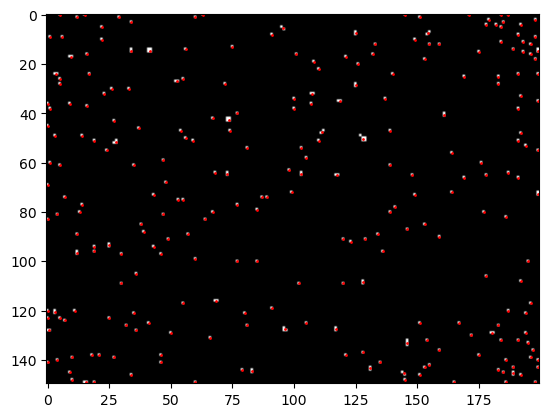

In [13]:
print('Pranav')
for i in range(1,5):
    path = f'pratik/image{i}.jpeg'
    print(f'Processing image {i}')
    img = pranav_camera(path)
    plt.imshow(img, cmap='gray')
    plt.show()
    plot_stars(img)

# print('Manas')
# for i in range(1,5):
#     path = f'pratik/image{i}.jpeg'
#     print(f'Processing image {i}')
#     img = manas_camera(path)
#     plt.imshow(img, cmap='gray')
#     plt.show()
#     plot_stars(img)


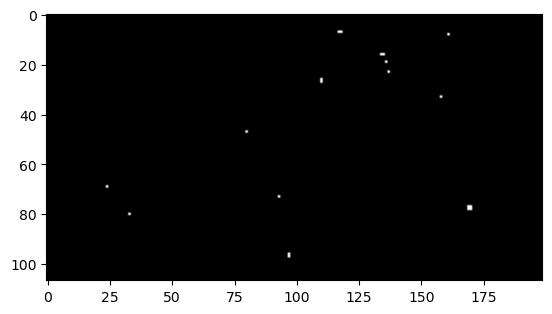

[[7.0, 117.5], [8.0, 161.0], [16.0, 134.5], [19.0, 136.0], [23.0, 137.0], [26.5, 110.0], [33.0, 158.0], [47.0, 80.0], [69.0, 24.0], [73.0, 93.0], [77.5, 169.5], [80.0, 33.0], [96.5, 97.0]]
Number of stars: 13
Coordinates of stars: [[7.0, 117.5], [8.0, 161.0], [16.0, 134.5], [19.0, 136.0], [23.0, 137.0], [26.5, 110.0], [33.0, 158.0], [47.0, 80.0], [69.0, 24.0], [73.0, 93.0], [77.5, 169.5], [80.0, 33.0], [96.5, 97.0]]


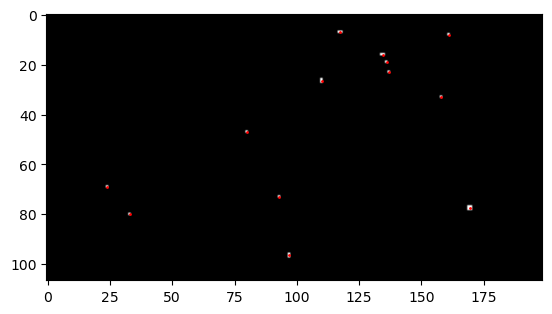

In [21]:
# Change of Basis:

img = pranav_camera('skyimages/image5.jpg')
plt.imshow(img, cmap='gray')
plt.show()
coord = get_stars(copy.deepcopy(img))
# for c in coord: print(c); print('-----------------')
print(coord)
plot_stars(img)
# # choose top 3 bright and close stars and store them as c0, cx, cy
# # c0,c1,c2 = sorted(coord, key=lambda x: x[2] * (x[0] + x[1] + x[2]), reverse=True)[:3]

# c0,c1,c2 = rr.choices(coord, k=3)

# # Chaneg the basis with c0 as the origin, cx as the x-axis and cy as the y-axis

# plt.imshow(img, cmap='gray')
# plt.scatter(c0[1], c0[0], c='red', s = 10, label='origin')
# plt.scatter(c1[1], c1[0], c='blue', s = 10, label='(1,0)')
# plt.scatter(c2[1], c2[0], c='green', s = 10, label='(0,1)')
# plt.legend()
# # Join the origin with the other two points with arrows
# plt.arrow(c0[1], c0[0], c1[1] - c0[1], c1[0] - c0[0], head_width=3, head_length=3, fc='blue', ec='blue')
# plt.arrow(c0[1], c0[0], c2[1] - c0[1], c2[0] - c0[0], head_width=3, head_length=3, fc='green', ec='green')

# plt.show()
# import numpy as np
# coord = np.array(coord)
# coord = coord[:, :2]
# # for c in coord: print(c)
# print(coord)
# coord = coord - c0[:2]
# # c0 = c0[:2] - c0[:2]; c1 = c1[:2] - c0[:2]; c2 = c2[:2] - c0[:2]
# basis = np.array([c1, c2])
# print(coord)
# # new_coord2 =np.matmul(np.linalg.inv(basis), coord.T).T
# new_coord =np.matmul(coord, np.linalg.inv(basis))
# # print(new_coord2, np.allclose(new_coord, new_coord2)) 
# print(new_coord)
# # coord

Number of stars: 14  

**Traditional Method**  
8281  
Redundunt: 4792  

**Our Method**  
Interations: 1365  
Redundunt: 605  

[[7.0, 117.5], [8.0, 161.0], [16.0, 134.5], [19.0, 136.0], [23.0, 137.0], [26.5, 110.0], [33.0, 158.0], [47.0, 80.0], [69.0, 24.0], [73.0, 93.0], [77.5, 169.5], [80.0, 33.0], [96.5, 97.0]]
{117500: 7.0, 161000: 8.0, 134500: 16.0, 136000: 19.0, 137000: 23.0, 110000: 26.5, 158000: 33.0, 80000: 47.0, 24000: 69.0, 93000: 73.0, 169500: 77.5, 33000: 80.0, 97000: 96.5}
{7000: 0, 8000: 1, 16000: 2, 19000: 3, 23000: 4, 26500: 5, 33000: 6, 47000: 7, 69000: 8, 73000: 9, 77500: 10, 80000: 11, 96500: 12}


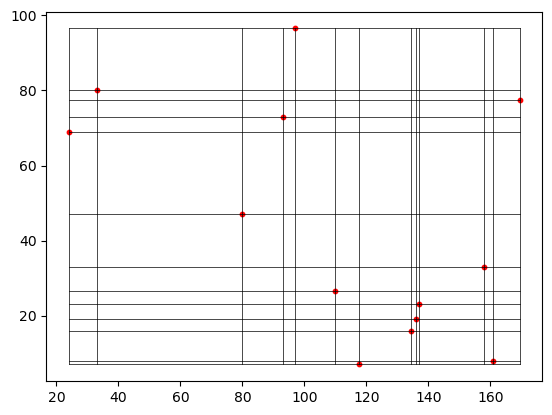

Number of stars: 13
1001
Redundunt: 236
Percent Redundancy: 23.57642357642358%
6084
Redundunt: 1844
Percent Redundancy: 30.309007232084156%


In [23]:
print(coord )
x_coord = [c[1].__round__(3) for c in coord]
y_coord = [c[0].__round__(3) for c in coord]
x_to_y = {int(x*1000):y for y,x in coord}
# print(x_coord, y_coord)
xs = list(sorted(x_coord))
ys = list(sorted(y_coord))
ind_ys = {int(y*1000):i for i,y in enumerate(ys)}
print(x_to_y)
print(ind_ys)
for x,y in zip(x_coord, y_coord):
    # plot vertical and horizontal lines
    plt.plot([x, x], [ys[0], ys[-1]], 'k-', lw=0.5)
    plt.plot([xs[0], xs[-1]], [y, y], 'k-', lw=0.5)
plt.scatter(x_coord, y_coord, c='red', s = 10)
plt.show()
N = len(xs)
print(f'Number of stars: {len(coord)}')

# Get through all sub regions
reg  = []
redundunt = 0
for xi in range(N):
    for xj in range(xi+1, N):
        ymin, ymax = sorted([x_to_y[int(x*1000)] for x in [xs[xi], xs[xj]]])
        yminind, ymaxind = ind_ys[int(ymin*1000)], ind_ys[int(ymax*1000)]

        for yi in range(yminind, ymaxind):
            for yj in range(yi+1, ymaxind):
                count = 0
                for x,y in coord:
                    if xs[xi] <= x <= xs[xj] and ys[yi] <= y <= ys[yj]:
                        count += 1
                if count > 0:
                    redundunt += 1
                reg.append((xs[xi], xs[xj], ys[yi], ys[yj], count))

print(len(reg))
# print(reg)
print(f'Redundunt: {redundunt}')
print(f'Percent Redundancy: {redundunt/len(reg)*100}%')

reg  = []
redundunt = 0
for xi in range(N):
    for xj in range(xi+1, N):
        # ymin, ymax = sorted([x_to_y[int(x*1000)] for x in [xs[xi], xs[xj]]])
        # yminind, ymaxind = ind_ys[int(ymin*1000)], ind_ys[int(ymax*1000)]

        for yi in range(N):
            for yj in range(yi+1, N):
                count = 0
                for x,y in coord:
                    if xs[xi] <= x <= xs[xj] and ys[yi] <= y <= ys[yj]:
                        count += 1
                if count > 0:
                    redundunt += 1
                reg.append((xs[xi], xs[xj], ys[yi], ys[yj], count))
print(len(reg))
# print(reg)
print(f'Redundunt: {redundunt}')
print(f'Percent Redundancy: {redundunt/len(reg)*100}%')


# draw vertical and horizontal lines all the points
# plt.imshow(img, cmap='gray')

Size: 7
[[7.0, 117.5], [8.0, 161.0], [16.0, 134.5], [19.0, 136.0], [23.0, 137.0], [26.5, 110.0], [33.0, 158.0]]
Number of sub-regions: 78
Number of stars: 13
Coordinates of stars: [[7.0, 117.5], [8.0, 161.0], [16.0, 134.5], [19.0, 136.0], [23.0, 137.0], [26.5, 110.0], [33.0, 158.0], [47.0, 80.0], [69.0, 24.0], [73.0, 93.0], [77.5, 169.5], [80.0, 33.0], [96.5, 97.0]]


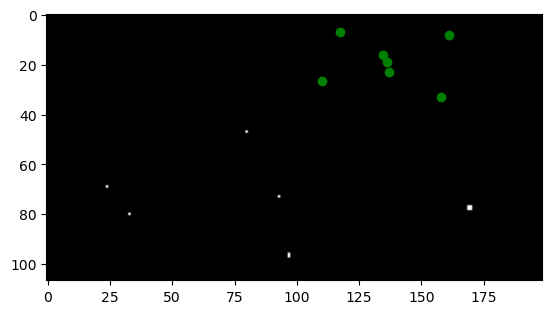

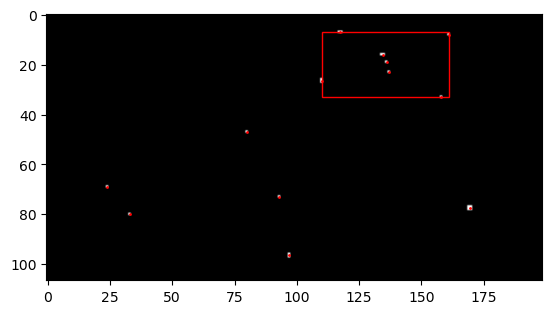

In [45]:
def print_subregions(coord: list[int]):
  """
  Prints all continuous subregions of stars in the given list.

  Args:
      coord: A list of 2D coordinates (x, y) as tuples.
  """
  # Create a dictionary where keys are coordinates rounded to the nearest thousandth,
  # and values are lists of stars in that coordinate.
  # choose ith star and jth star and find the region between them
  # Number of sub-regions = (n-1)C2
  num_subregions = 0
  constelations = {}
  for i in range(len(coord)):
    stars = [coord[i]]
    size = 1
    for j in range(i+1, len(coord)):
      stars.append(coord[j])
      size += 1
      if i==0 and j==6:
        plt.scatter([c[1] for c in stars], [c[0] for c in stars], c='green')
        print(f'Size: {size}')
        # plt.show()
        print(stars)
      # for con in constelations:
      #    if isequal1(con,stars):
      #       print(f"Detected a sub-region: {stars} as {con}")
      #       break
        # isequal1 -> change if basis
        # isequal2 -> angles
        # isequal3 -> normalized distances
      num_subregions += 1 
      # print(f"Sub-region {num_subregions}: {stars}")
  print(f"Number of sub-regions: {num_subregions}")

print_subregions(coord)

def plot_subregions(img):
    # find the coordinates of the stars
    img_temp = copy.deepcopy(img)
    coordinaates = get_stars(img_temp)
    # Now, let's plot the stars in the image
    print('Number of stars:', len(coordinaates))
    print('Coordinates of stars:', coordinaates)
    plt.imshow(img, cmap='gray')
    
    # for star in coordinaates:
    #     plt.scatter(star[1], star[0], c='red', s = 1)
    # plt.show()
    import matplotlib.patches as patches
    fig, ax = plt.subplots()
    ax.imshow(img, cmap='gray')
    for star in coordinaates:
        ax.scatter(star[1], star[0], c='red', s = 1)
    # Create a Rectangle patch
    for i in range(len(coordinaates)):
        s = 1
        x1, y1 = coordinaates[i][0], coordinaates[i][1]
        x2, y2 = coordinaates[i][0], coordinaates[i][1]
        for j in range(i+1, len(coordinaates)):
            s += 1
            x1, y1 = min(x1, coordinaates[j][0]), min(y1, coordinaates[j][1])
            x2, y2 = max(x2, coordinaates[j][0]), max(y2, coordinaates[j][1])
            if i==0 and j == 6:
              rect = patches.Rectangle((y1, x1), y2-y1, x2-x1, linewidth=1, edgecolor='r', facecolor='none')
              ax.add_patch(rect)
    plt.show()
    

plot_subregions(img)

